In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import json

In [2]:
class Plotter():
    def __init__(self, results_path):
        self.results_path = results_path


    def plot_history(self, fname='history.csv', columns_to_plot=['val_loss', 'val_accuracy']):
        df = pd.read_csv(os.path.join(self.results_path, fname))
        epochs = np.arange(1, df.shape[0]+1)

        for col in columns_to_plot:
            plt.figure(figsize=(8, 5))
            name = col.replace('_', ' ').replace('val', '').strip().title()
            plt.title('Training history - {}'.format(name))

            plt.scatter(epochs, df[col])
            plt.plot(epochs, df[col])

            plt.xlabel('Epoch')
            plt.ylabel(name)            
            plt.tight_layout()
            plt.show()

    def plot_confusion_matrix(self, labels=None, fname='metrics.json', cmap=plt.cm.Blues):
        with open(os.path.join(self.results_path, fname), 'r') as f:
            conf_mat = np.array(json.load(f)['conf_matrix'])

        if labels is None:
            labels = [str(x) for x in range(conf_mat.shape[0])]

        disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)
        disp.plot(include_values=True, cmap=cmap, ax=None, xticks_rotation=45.0,
                     values_format=None, colorbar=False)


In [7]:
results = 'results/results_1a_04-29_20-19_6253e41'
labels = [
    'Afghan\nhound',
    'Maltese dog',
    'Scottish\ndeerhound'
]

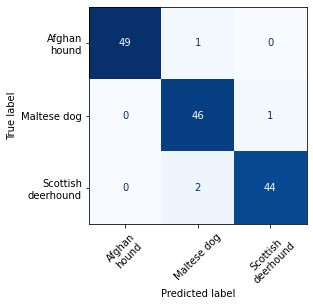

In [8]:
plotter = Plotter(results)
plotter.plot_confusion_matrix(labels=labels)

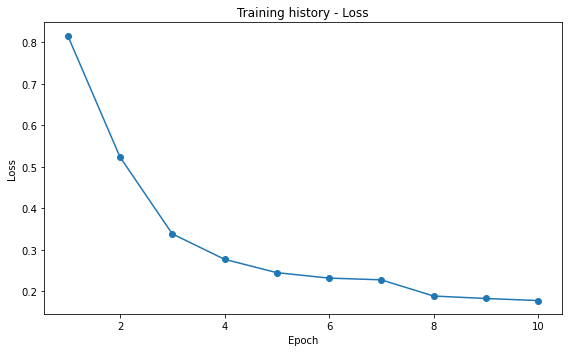

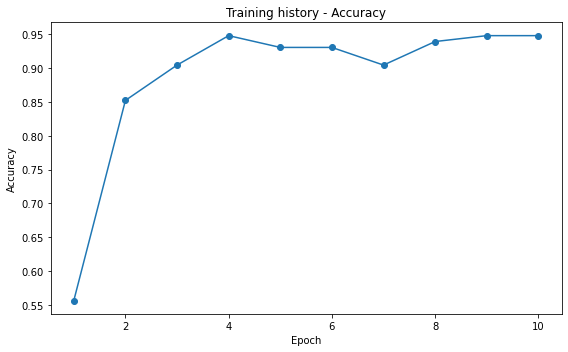

In [9]:
plotter.plot_history()